### Problem Statement

As a business manager, try to find out the weak areas you can work to make more profit in Superstore dataset using EDA

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

    Reading Superstore dataset

In [3]:
retail = pd.read_csv('Superstore.csv')

In [4]:
retail.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


Sorting the data by profit into ascending order

In [5]:
retail.sort_values(by = 'Profit', ascending = True)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
7772,Standard Class,Consumer,United States,Lancaster,Ohio,43130,East,Technology,Machines,4499.985,5,0.7,-6599.9780
683,Same Day,Corporate,United States,Burlington,North Carolina,27217,South,Technology,Machines,7999.980,4,0.5,-3839.9904
9774,Standard Class,Consumer,United States,San Antonio,Texas,78207,Central,Office Supplies,Binders,2177.584,8,0.8,-3701.8928
3011,Standard Class,Home Office,United States,Louisville,Colorado,80027,West,Technology,Machines,2549.985,5,0.7,-3399.9800
4991,Standard Class,Corporate,United States,Chicago,Illinois,60653,Central,Office Supplies,Binders,1889.990,5,0.8,-2929.4845
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4098,Standard Class,Consumer,United States,Minneapolis,Minnesota,55407,Central,Office Supplies,Binders,9449.950,5,0.0,4630.4755
9039,Standard Class,Consumer,United States,Detroit,Michigan,48205,Central,Office Supplies,Binders,9892.740,13,0.0,4946.3700
4190,Standard Class,Consumer,United States,Newark,Delaware,19711,East,Technology,Copiers,10499.970,3,0.0,5039.9856
8153,First Class,Consumer,United States,Seattle,Washington,98115,West,Technology,Copiers,13999.960,4,0.0,6719.9808


    Checking the structure of the data

In [6]:
retail.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [7]:
retail.shape

(9994, 13)

In [8]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [9]:
retail.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


    Data Quality Check and Missing Values

In [10]:
retail.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

    Data Inspection

In [11]:
retail.Country.unique()

array(['United States'], dtype=object)

    We can see column country has only one country United States, this column will not be helpfull during analysis, we can drop this column

In [12]:
retail.groupby(['State', 'City'])['Region'].count().shape

(604,)

In [13]:
retail.groupby(['State', 'City'])['Postal Code'].count().shape

(604,)

Checked data dimension of Region and Postal Code.

Region and Postal Code seems to have redundant features because shape of the dataframe is same.

In [14]:
retail.drop(['Country', 'Postal Code'], axis = 1, inplace = True)

In [15]:
retail.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


    1. Data is biased towards United States so dropping column 'Country' won't affect further analysis.
    2. Dropped column 'Postal Code' because postal code is something which is regional so, we can draw same insights using column 'Region, City, and State'.

In [16]:
retail.shape

(9994, 11)

    1. We saw dataset is having 'Sub - Category' and 'Quantity' columns. But Quantity can belongs to Quantity of a particular product.
    2. In a Sub - Category so there can be multiple quantity for a Sub - Category considering all the other scope.
    3. Granularity of Data Quantity is at Sub - Category or product level.

In [17]:
retail.groupby(['State', 'City', 'Region', 'Ship Mode', 'Segment', 'Category', 'Sub-Category'])['Quantity'].nunique().reset_index()

,State,City,Region,Ship Mode,Segment,Category,Sub-Category,Quantity
0,Alabama,Auburn,South,Second Class,Consumer,Office Supplies,Envelopes,1
1,Alabama,Auburn,South,Second Class,Consumer,Office Supplies,Labels,1
2,Alabama,Auburn,South,Standard Class,Consumer,Furniture,Chairs,1
3,Alabama,Auburn,South,Standard Class,Consumer,Office Supplies,Paper,1
4,Alabama,Auburn,South,Standard Class,Consumer,Office Supplies,Storage,1
...,...,...,...,...,...,...,...,...
5791,Wisconsin,Wausau,Central,Standard Class,Consumer,Office Supplies,Binders,1
5792,Wisconsin,Wausau,Central,Standard Class,Consumer,Office Supplies,Storage,2
5793,Wisconsin,West Allis,Central,Second Class,Corporate,Furniture,Bookcases,1
5794,Wisconsin,West Allis,Central,Second Class,Corporate,Office Supplies,Binders,1


    1. We can see the Quantity is at product level but we have not any product column, so data should be granular at Sub-Category. 
    2. We need to consider this in our analysis.

#### Checking for Outliers

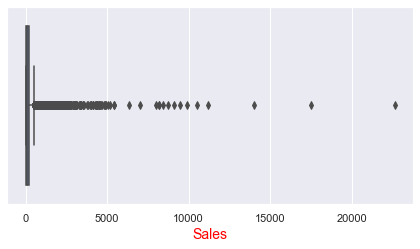

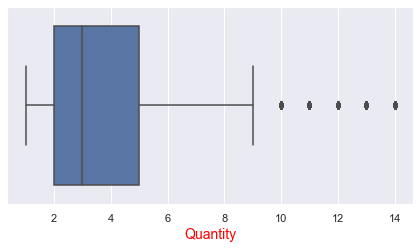

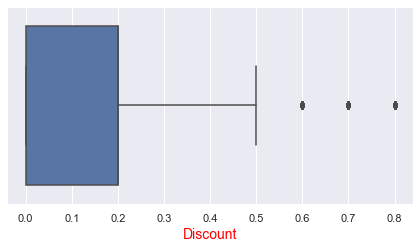

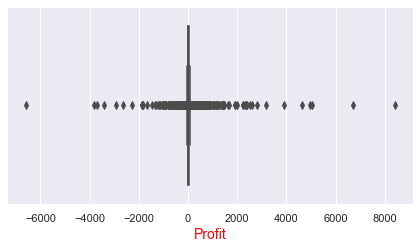

In [18]:
plt.figure(figsize = [16,8])
sns.set_theme()
plt.subplot(2,2,1)
sns.boxplot(retail['Sales'])
plt.xlabel('Sales', fontdict = {'color':'red', 'fontsize':14})

plt.figure(figsize = [16,8])
sns.set_theme()
plt.subplot(2,2,2)
sns.boxplot(retail['Quantity'])
plt.xlabel('Quantity', fontdict = {'color':'red', 'fontsize':14})

plt.figure(figsize = [16,8])
sns.set_theme()
plt.subplot(2,2,3)
sns.boxplot(retail['Discount'])
plt.xlabel('Discount', fontdict = {'color':'red', 'fontsize':14})

plt.figure(figsize = [16,8])
sns.set_theme()
plt.subplot(2,2,4)
sns.boxplot(retail['Profit'])
plt.xlabel('Profit', fontdict = {'color':'red', 'fontsize':14})

plt.show()

     Large no. of outliers are present in Sales and Profit column.

#### Numerical Summary to understand the pattern in order to check outliers

In [19]:
retail.describe(percentiles=[0.25, 0.75, 0.8, 0.9, 0.95, 0.99])

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
80%,281.372000,5.000000,0.200000,41.038800
90%,572.706000,7.000000,0.400000,89.281620
95%,956.984245,8.000000,0.700000,168.470400


    We need to analyze data at granular level. May need to explore pattern causing such outliers (High loss or Profit). Hence, lets not treating outliers.

 ### Data Visualization

#### Categorical unordered univariate analysis

Plotting the bar graph percentage of various columns [Ship Mode, Segment, Region, Category, Sub-Category] Categories

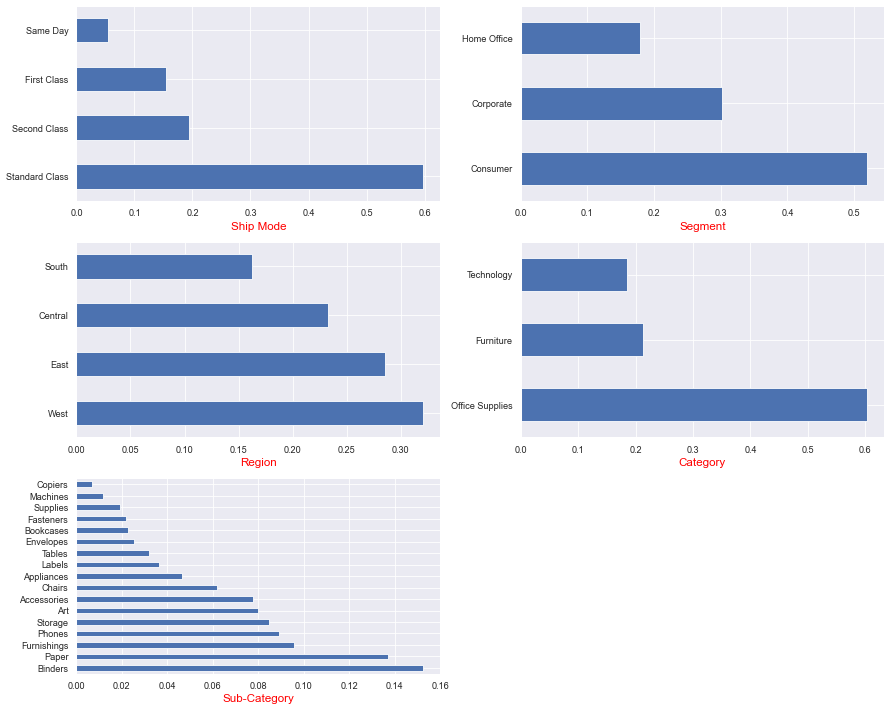

In [20]:
plt.figure(figsize = [15,12], dpi = 60, facecolor = 'w', edgecolor = 'k')
sns.set_theme()

plt.subplot(3,2,1)
retail['Ship Mode'].value_counts(normalize = True).plot.barh()
plt.xlabel('Ship Mode', fontdict = {'color':'red', 'size': 14})


plt.subplot(3,2,2)
retail['Segment'].value_counts(normalize = True).plot.barh()
plt.xlabel('Segment', fontdict = {'color':'red', 'size': 14})


plt.subplot(3,2,3)
retail['Region'].value_counts(normalize = True).plot.barh()
plt.xlabel('Region', fontdict = {'color':'red', 'size': 14})


plt.subplot(3,2,4)
retail['Category'].value_counts(normalize = True).plot.barh()
plt.xlabel('Category', fontdict = {'color':'red', 'size': 14})


plt.subplot(3,2,5)
retail['Sub-Category'].value_counts(normalize = True).plot.barh()
plt.xlabel('Sub-Category', fontdict = {'color':'red', 'size': 14})

plt.tight_layout()
plt.show()

    1. Shipe Mode: Standard Class is having higher percentage while Same Day is having lower percentage of transaction.
    
    2. Segment: Cunsumer are more in numbers than Corporate and Home Office.
    
    3. Region: East & West region is having large distribution.
    
    4. Category: Office Supplies are larger in proportion.
    
    5. Sub-Category: Paper and Binder are having major distribution / transaction and copiers is having lesser transcations.

     Plotting the bar graph of percentage distribution of various States

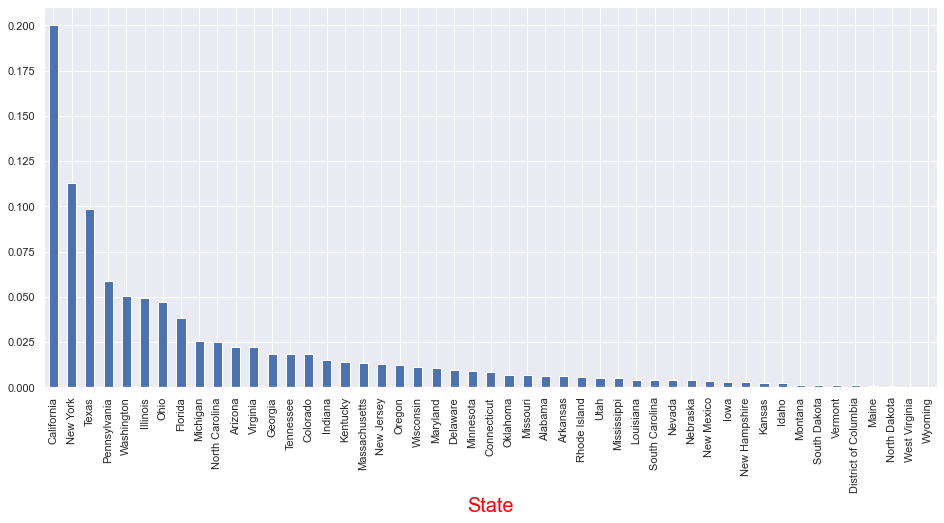

In [21]:
plt.figure(figsize = [16,7])
sns.set_theme()

retail['State'].value_counts(normalize = True).plot.bar()
plt.xlabel('State', fontdict = {'color':'red', 'size':20})

plt.show()

    Calirfornia is having higher transaction whereas New York and Taxes is moderate one.

#### Bivariate Analysis

##### Numeric: Numeric Analysis

    There are three ways to analyse the numeric data types simultaneously.
    
    1. Scatter Plot: Describe the pattern that how one variable is varying with other variable.
    
    2. Correlation Matrix: To describe the linearity of two numeric variable.
    
    3. Pair Plot: Group of Scatter plots of all numeric variables in the data frame.

Plotting the pair plot of Sales, Quantity, Discount, and Profit in retail dataframe.

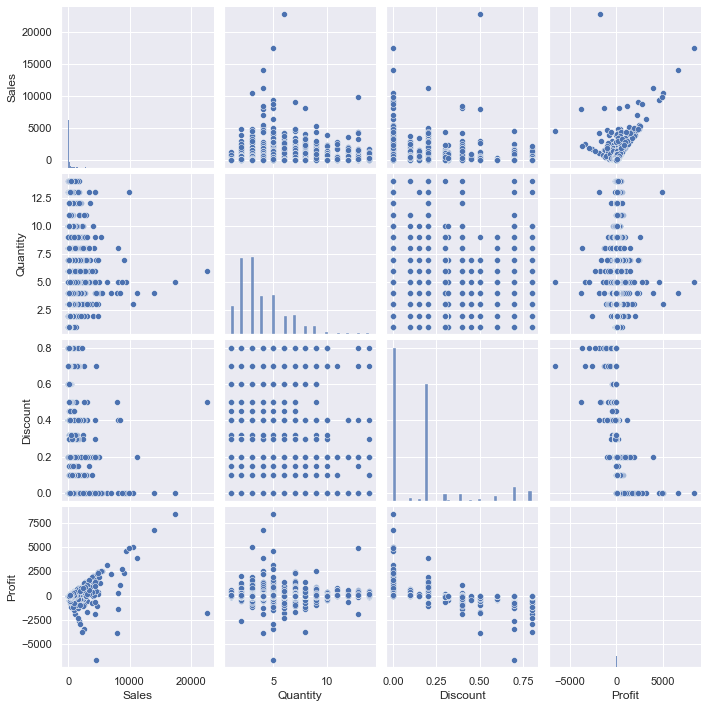

In [22]:
sns.pairplot(retail[['Sales','Quantity','Discount', 'Profit']])
plt.show()

    1. We cannot see any patterns for Quantity over Proft and Sales. But we have highest Sales and Profit at Quantity equal to 5.
    
    2. Discount and Profit is highly correlated in negative direction i.e these are inversely propotional so, if particular sale increases then this will decrease the profit.
    
    3. We can also observe that highest Sales are at 50% discount which seems to be an outlier.

#### Let's Visualize trend of Sales, Profit, Discount and Quantity closely using line graph

Trend of profit across various discount

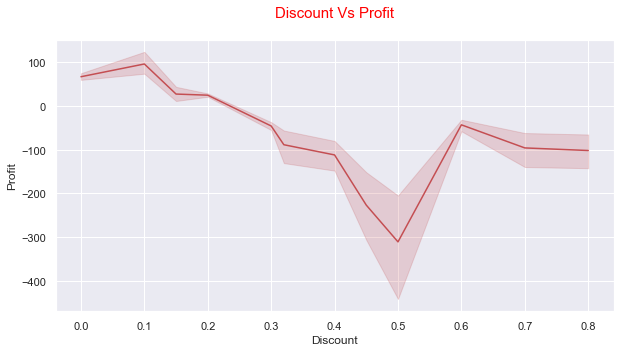

In [23]:
plt.figure(figsize = (10,5))
plt.title('Discount Vs Profit\n', fontdict = {'color':'red', 'size':15})
sns.lineplot(x = 'Discount', y = 'Profit', data = retail, color = 'r')
plt.show()

    1. For minimum discount, Profit was good but as discount increases, profit goes down.
    
    2. Here we can see discount above 23% leads to loss.
    
    3. We can observe at 50% discount, there is the lowest profit or highest loss.

Trend of Sales across various discount

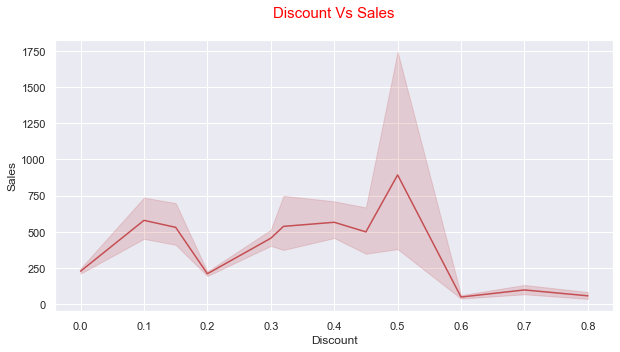

In [24]:
plt.figure(figsize = (10,5))
plt.title('Discount Vs Sales\n', fontdict = {'color':'red', 'size':15})
sns.lineplot( x = 'Discount', y = 'Sales', data = retail, color = 'r')
plt.show()

     1. We can see up and down trends for sales over discount. There Peak sale is at 50% discount and beyond 50% discount, sales decreases gradually, might be customer doubted product quality having discount more than 50 - 60%.

#### Numeric Analysis can also visualize using Correlation heatmap

Creating a matrix using Sales, Quantity, Discount and Profit in retail dataframe as rows and columns

In [25]:
matrix = retail[['Sales', 'Quantity', 'Discount', 'Profit']].corr()
matrix

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200795,-0.028190,0.479064
Quantity,0.200795,1.000000,0.008623,0.066253
Discount,-0.028190,0.008623,1.000000,-0.219487
Profit,0.479064,0.066253,-0.219487,1.000000


Plotting the heatmap of Sales, Quantity, Discount and Profit of above correlation matrix

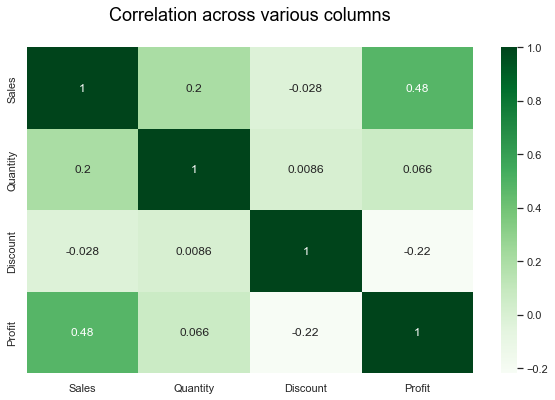

In [26]:
plt.figure(figsize = [10,6])
plt.title('Correlation across various columns\n', fontdict = {'color':'black', 'size': 18})

sns.heatmap(matrix, cmap = 'Greens', annot = True)
plt.show()

    1. Sales and Profit is having highest correlation 0.48
    
    2. Discount and Profit is having highest negative correlation -0.22 (inverse relation)

#### Numerical Categorical Analysis

##### Ship Mode Vs Profit & Ship Mode Vs Sales

Groupby the Ship Mode to find the mean of the profit and sales seperately

In [27]:
retail.groupby('Ship Mode')['Profit','Sales'].mean()

,Profit,Sales
Ship Mode,,
First Class,31.839948,228.497024
Same Day,29.266591,236.396179
Second Class,29.535545,236.089239
Standard Class,27.494770,227.583067


1. Plotting the bar graph of profit for the ship mode categories.
2. Plotting the bar graph of Sales for the ship mode categories.

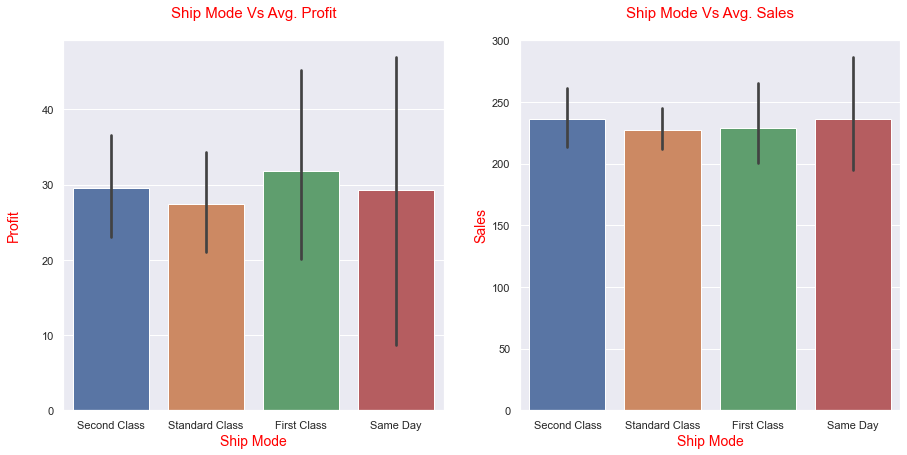

In [28]:
plt.figure(figsize=[15,15])
sns.set_theme()
plt.subplot(2,2,1)
sns.barplot(retail['Ship Mode'], retail.Profit)
plt.title('Ship Mode Vs Avg. Profit\n', fontdict = {'color': 'red', 'size': 15})
plt.xlabel('Ship Mode', fontdict = {'color':'red', 'size': 14})
plt.ylabel('Profit\n', fontdict = {'color': 'red', 'size': 14})

plt.subplot(2,2,2)
sns.barplot(retail['Ship Mode'], retail.Sales)
plt.title('Ship Mode Vs Avg. Sales\n', fontdict = {'color': 'red', 'size': 15})
plt.xlabel('Ship Mode', fontdict = {'color':'red', 'size': 14})
plt.ylabel('Sales', fontdict = {'color': 'red', 'size': 14})
plt.show()

    1. First calss shipment mode is making highest avaerage profit and Same Day has highest average sales.
    
    2. Whereas Standard Class is having less average profit as well as sales.

#### Let's Visualize Shipment Mode wise Total Profit or Sales

Plotting the bar graph of total profit for ship mode categories.

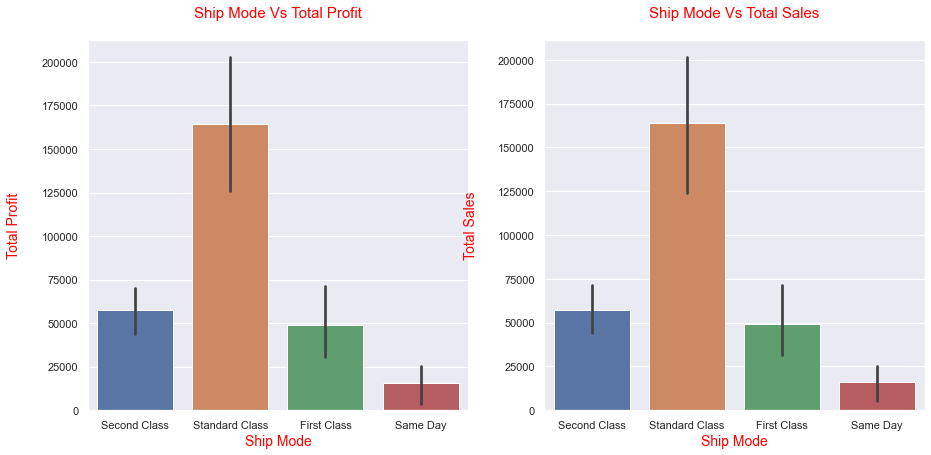

In [29]:
plt.figure(figsize = [15,15])
sns.set_theme()
plt.subplot(2,2,1)
sns.barplot(retail['Ship Mode'], retail.Profit, estimator = sum)
plt.title('Ship Mode Vs Total Profit\n', fontdict = {'color': 'red', 'size': 15})
plt.xlabel('Ship Mode', fontdict = {'color': 'red', 'size': 14})
plt.ylabel('Total Profit\n', fontdict = {'color': 'red', 'size': 14})


plt.subplot(2,2,2)
sns.barplot(retail['Ship Mode'], retail.Profit, estimator = sum)
plt.title('Ship Mode Vs Total Sales\n', fontdict = {'color': 'red', 'size': 15})
plt.xlabel('Ship Mode', fontdict = {'color': 'red', 'size': 14})
plt.ylabel('Total Sales\n', fontdict = {'color': 'red', 'size': 14})
plt.show()

    1. Here we can see a drastic change is graphs. Though we have comparatively more averge profit of Same Day shipment mode but it is making less overall profit and slae for business. Reason for this might be less people prefer Same Day shipment mode. We can focus on marketing of Same Day shipment mode.
    
    2. On other hand, though we have lesser average profit for Standard Class shipment mode but large no. of Customers prefer this mode which leads to large overall profit for business.

#### Segment Vs Profit & Segment Vs Sale

Groupby the segment to find the mean of the profit and sales respec.

In [30]:
retail.groupby('Segment')['Profit', 'Sales'].mean().round(2)

,Profit,Sales
Segment,,
Consumer,25.84,223.73
Corporate,30.46,233.82
Home Office,33.82,240.97


Groupby the segment to find the mean of the profit and sales seperately

In [31]:
retail.groupby('Segment')['Profit', 'Sales'].sum()

,Profit,Sales
Segment,,
Consumer,134119.2092,1.161401e+06
Corporate,91979.1340,7.061464e+05
Home Office,60298.6785,4.296531e+05


1. plot the bar plot of profit for various Segments.

2. Plot the bar plot of sales for various Segments.

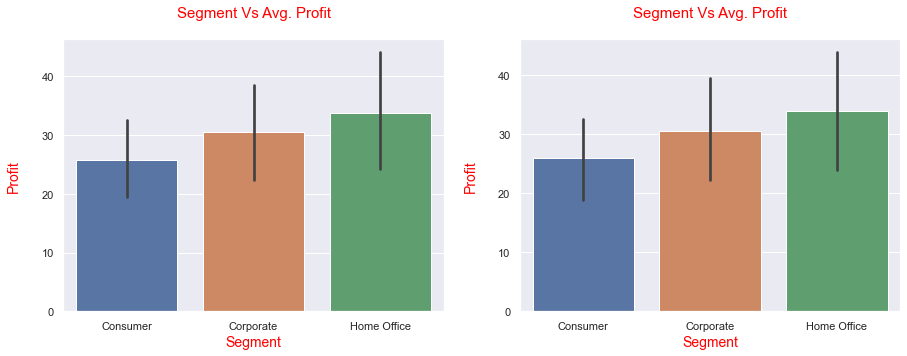

In [32]:
plt.figure(figsize = [15,5])
sns.set_theme()
plt.subplot(1,2,1)
sns.barplot(retail['Segment'], retail.Profit)
plt.title('Segment Vs Avg. Profit\n', fontdict = {'color': 'red', 'size':15})
plt.xlabel('Segment', fontdict = {'color': 'red', 'size': 14})
plt.ylabel('Profit\n', fontdict = {'color':'red', 'size':14})

plt.subplot(1,2,2)
sns.barplot(retail['Segment'], retail.Profit)
plt.title('Segment Vs Avg. Profit\n', fontdict = {'color': 'red', 'size':15})
plt.xlabel('Segment', fontdict = {'color': 'red', 'size': 14})
plt.ylabel('Profit\n', fontdict = {'color':'red', 'size':14})
plt.show()

    1. Home Office segment is making highest average profit as well as average sales.
    
    2. Consumer segment is having less average profit as well as sales.

#### Note: But we saw in count plot that segment Consumer is having highest transcation than other segment. So, lets visualize overall profit and Sales segment wise.

    1. Plot the bar plot of profit for various segments.
    
    2. Plot the bar plot of sales for various segments.

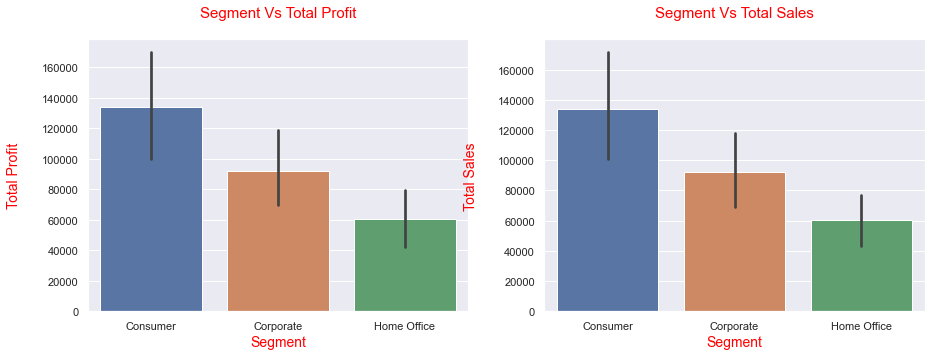

In [33]:
plt.figure(figsize = [15,5])
sns.set_theme()
plt.subplot(1,2,1)
sns.barplot(retail['Segment'], retail.Profit, estimator = sum)
plt.title('Segment Vs Total Profit\n', fontdict = {'color': 'red', 'size': 15})
plt.xlabel('Segment', fontdict = {'color': 'red', 'size': 14})
plt.ylabel('Total Profit\n', fontdict = {'color': 'red', 'size': 14})


plt.subplot(1,2,2)
sns.barplot(retail['Segment'], retail.Profit, estimator = sum)
plt.title('Segment Vs Total Sales\n', fontdict = {'color': 'red', 'size': 15})
plt.xlabel('Segment', fontdict = {'color': 'red', 'size': 14})
plt.ylabel('Total Sales\n', fontdict = {'color': 'red', 'size': 14})
plt.show()

    1. These graphs are giving totally different insights. As we saw in previous graphs average profit and sales of segment Home Office is high.
    
    2. But if we see over all profit segment wise, Home Office is making lowest total profit as well as total sales. Reason behind this might be less transactions for this segment. So, we need to target this segment and try to increase total transactions.

#### State Vs Profit and State Vs Sales

    1. Groupby the state to find the mean of the profit and sales respeec.

In [34]:
retail.groupby('State')['Profit', 'Sales'].mean()

,Profit,Sales
State,,
Alabama,94.865989,319.846557
Arizona,-15.303235,157.508933
Arkansas,66.811452,194.635500
California,38.171608,228.729451
Colorado,-35.867351,176.418231
Connecticut,42.823071,163.223866
Delaware,103.930988,285.948635
District of Columbia,105.958930,286.502000
Florida,-8.875461,233.612815


Plot the bar plot of Profit across various States

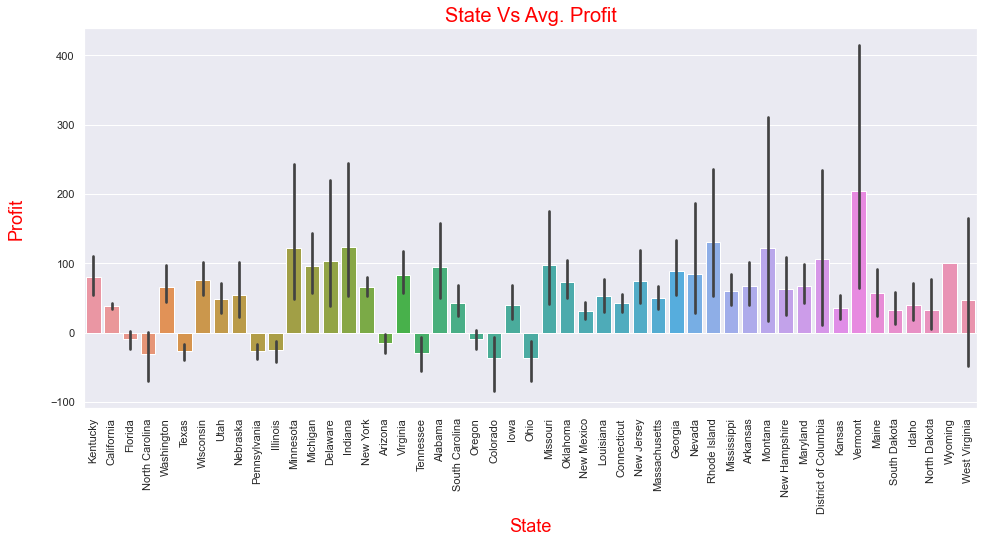

In [35]:
plt.figure(figsize = [16,7])
sns.set_theme()
sns.barplot(retail['State'], retail.Profit)
plt.title('State Vs Avg. Profit', fontdict = {'color':'red', 'size':20})
plt.xticks(rotation = 90)
plt.xlabel('State', fontdict = {'color':'red', 'size': 18})
plt.ylabel('Profit\n', fontdict = {'color':'red', 'size': 18})
plt.show()

    1. Vermont state is making highest average profit whereas California, New Mexico, Kansas, South Dakota, North Dakota are some of the state which are having very less profit.
    
    2. Florida, North Carolina, Texas, Pennsylvania, Illinois, Arizona, Tennessee, Oregon, Colorado, Ohio are the states that are in loss which is represented as negative profit in the above bar graph.

Plot the bar plot of Sales across various states.

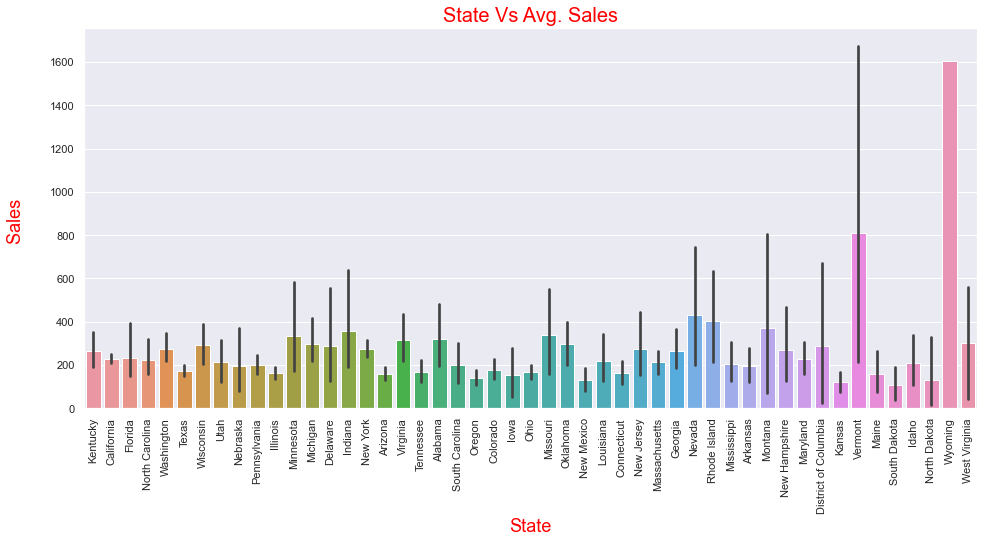

In [36]:
plt.figure(figsize=[16,7])
sns.set_theme()

sns.barplot(retail['State'], retail.Sales)
plt.title('State Vs Avg. Sales', fontdict = {'color': 'red', 'size':20})
plt.xticks(rotation = 90)
plt.xlabel('State', fontdict = {'color': 'red', 'size': 18})
plt.ylabel('Sales \n', fontdict = {'color': 'red', 'size':18})
plt.show()

    State Wyoming and vermont have highest average sales whereas States South Dakota, Kansas and North Dakota have lowest average Sales.

#### Note: Though California has less average profit but we saw california has more number of transactions than the other states. Let's visualize overall profit and Sales State wise.

Plot the bar plot of Total Profit across various Cities

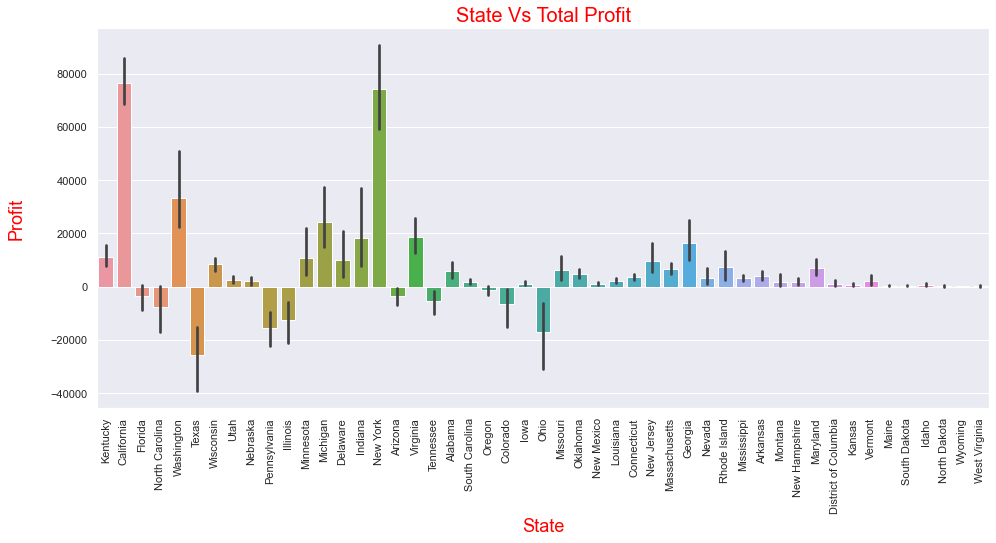

In [37]:
plt.figure(figsize = [16,7])
sns.set_theme()
sns.barplot(retail['State'], retail.Profit, estimator = sum)
plt.title('State Vs Total Profit', fontdict = {'color': 'red', 'size': 20})
plt.xticks(rotation = 90)
plt.xlabel('State', fontdict = {'color': 'red', 'size': 18})
plt.ylabel('Profit\n', fontdict = {'color': 'red', 'size': 18})
plt.show()

    1. There is no change in overall profit for states like Florida, North Carolina, Texas, Pennsylvania, Illionis, Arizona, Tennessee, Oregon, Colorado, Ohio making loss i.e., negative profit. We need to focus on such states.
    
    2. We saw average profit of Vermont state was highest than all the other states but the overall profit is less, same for the states Wyoming, WEst Virginia etc. Reason behind this might be highest average profit in these states but less total transactions. So, we need to focus on overall sales of such states.

Groupby the Region to find the mean of the profit and Sales respectively.

In [38]:
retail.groupby('Region')['Profit', 'Sales'].mean()

,Profit,Sales
Region,,
Central,17.092709,215.772661
East,32.135808,238.336110
South,28.857673,241.803645
West,33.849032,226.493233


1. Plot the bar plot of Profit for Different Regions.

2. Plt the bar plot of Sales for Different Regions.

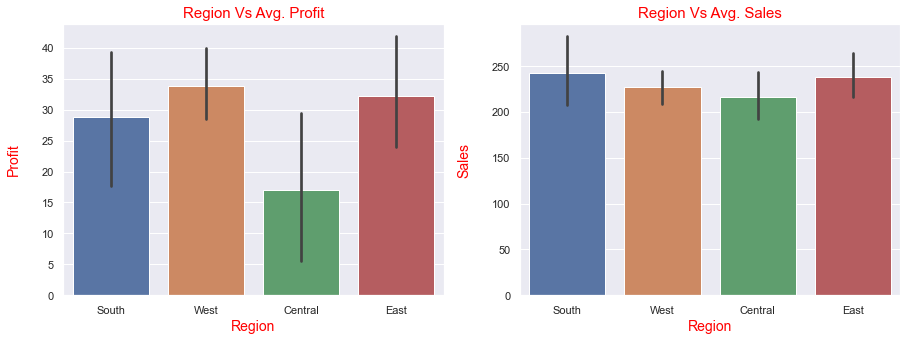

In [39]:
plt.figure(figsize = [15,5])
sns.set_theme()

plt.subplot(1,2,1)
sns.barplot(retail['Region'], retail.Profit)
plt.title('Region Vs Avg. Profit', fontdict = {'color': 'red', 'size': 15})
plt.xlabel('Region', fontdict = {'color': 'red', 'size': 14})
plt.ylabel('Profit\n', fontdict = {'color': 'red', 'size': 14})

plt.subplot(1,2,2)
sns.barplot(retail['Region'], retail.Sales)
plt.title('Region Vs Avg. Sales', fontdict = {'color': 'red', 'size': 15})
plt.xlabel('Region', fontdict = {'color': 'red', 'size': 14})
plt.ylabel('Sales\n', fontdict = {'color': 'red', 'size': 14})
plt.show()

    1. Highest profits are in the West and East region.
    2. Central region is having minimum profit as well as sales. Need to explore pattern for Central region why it is having less profit and work on that to excel business profit.

1. Plot the bar plot of profit for different Regions.

2. Plot the bar plot of States for different Regions.

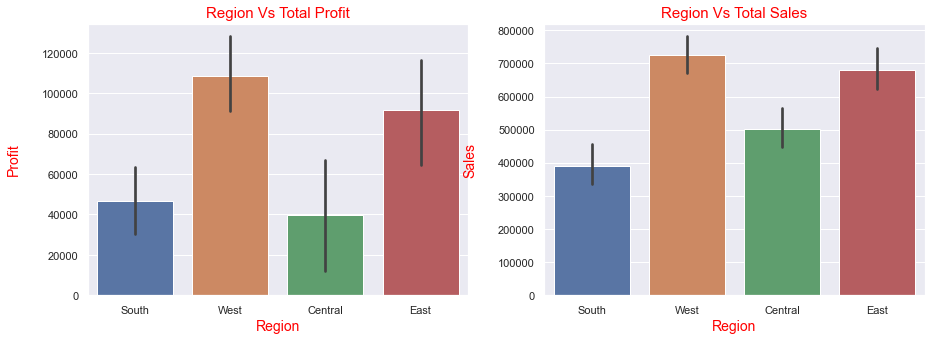

In [40]:
plt.figure(figsize = [15,5])

plt.subplot(1,2,1)
sns.barplot(retail['Region'], retail.Profit, estimator = sum)
plt.title('Region Vs Total Profit', fontdict = {'color': 'red', 'size': 15})
plt.xlabel('Region', fontdict = {'color':'red', 'size':14})
plt.ylabel('Profit\n', fontdict = {'color': 'red', 'size':14})

plt.subplot(1,2,2)
sns.barplot(retail['Region'], retail.Sales, estimator = sum)
plt.title('Region Vs Total Sales', fontdict = {'color': 'red', 'size': 15})
plt.xlabel('Region', fontdict = {'color':'red', 'size':14})
plt.ylabel('Sales\n', fontdict = {'color': 'red', 'size':14})
plt.show()

1. Overall profit and Sales are more in West Region whereas less in South Region.

#### Category Vs Profit and Category Vs Sales

Groupby the Cateogry to find the mean of the profit and sales.

In [41]:
retail.groupby('Category')['Profit','Sales'].mean()

,Profit,Sales
Category,,
Furniture,8.699327,349.834887
Office Supplies,20.327050,119.324101
Technology,78.752002,452.709276


1. Plot the bar plot of profit for different product category.

2. Plot the bar plot of sales for different product category.

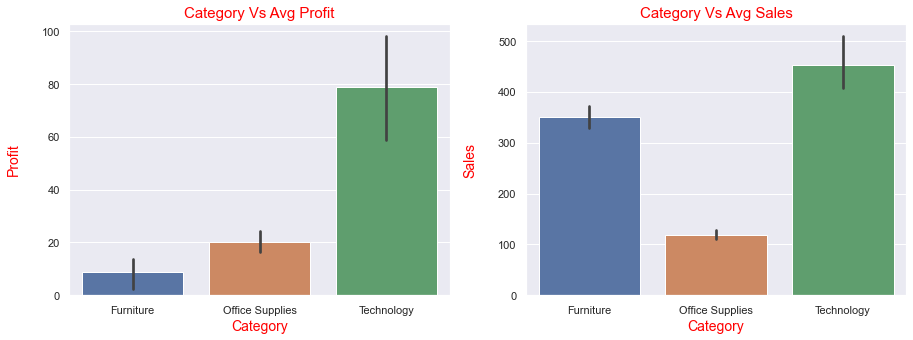

In [42]:
plt.figure(figsize = [15,5])

plt.subplot(1,2,1)
sns.barplot(retail['Category'], retail.Profit)
plt.title('Category Vs Avg Profit', fontdict = {'color': 'red', 'size': 15})
plt.xlabel('Category', fontdict = {'color': 'red', 'size': 14})
plt.ylabel('Profit\n', fontdict = {'color': 'red', 'size': 14})

plt.subplot(1,2,2)
sns.barplot(retail['Category'], retail.Sales)
plt.title('Category Vs Avg Sales', fontdict = {'color': 'red', 'size': 15})
plt.xlabel('Category', fontdict = {'color': 'red', 'size': 14})
plt.ylabel('Sales\n', fontdict = {'color': 'red', 'size': 14})
plt.show()

    1. Products belong to Technology category are making highest average profits as well as sales which means product of category technology are making good margin on each sale compared to others.
    
    2. Office Supplies are having minimum profit as well as sales whereas Furniture is making less profit large sales.

#### Though we have highest average profit for category Technology but we saw in count plot it has over all less transaction than other caterogires. Lets explore or visualize overall Profit and Sales Category wise.

1. Plot the bar plot of Total Profit for different product category
2. Plot the bar plot of Total Sales for different product category

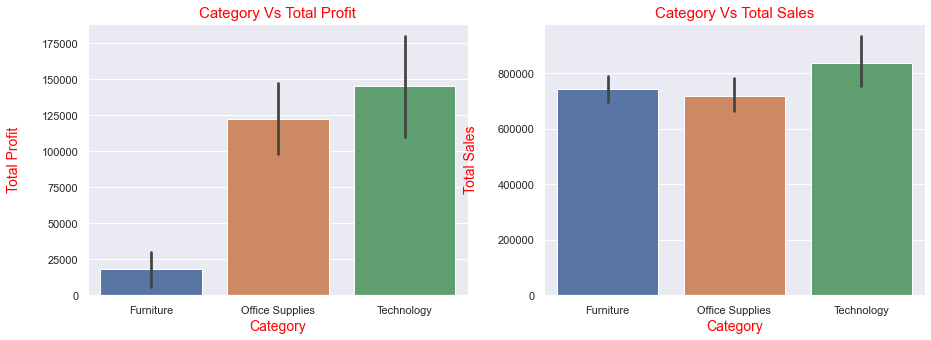

In [43]:
plt.figure(figsize = [15,5])

plt.subplot(1,2,1)
sns.barplot(retail['Category'], retail.Profit, estimator = sum)
plt.title('Category Vs Total Profit', fontdict = {'color': 'red', 'size':15})
plt.xlabel('Category', fontdict = {'color': 'red', 'size': 14})
plt.ylabel('Total Profit\n', fontdict = {'color': 'red', 'size': 14})


plt.subplot(1,2,2)
sns.barplot(retail['Category'], retail.Sales, estimator = sum)
plt.title('Category Vs Total Sales', fontdict = {'color': 'red', 'size':15})
plt.xlabel('Category', fontdict = {'color': 'red', 'size': 14})
plt.ylabel('Total Sales\n', fontdict = {'color': 'red', 'size': 14})
plt.show()

    1. As we can see clearly though Furniture has good sales but it is making less profit. It means there is lowest profit margin for each product of category Furniture compared to others.

#### Note: One of the reason for Category Furniture having lesser profit could be high discount as we saw in the trend. Let's visualize categories overall Average Discount.

1. Plot category with average discount

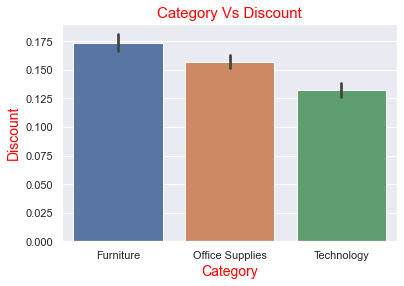

In [44]:
sns.barplot(retail['Category'], retail.Discount)
plt.title('Category Vs Discount', fontdict = {'color': 'red', 'size': 15})
plt.xlabel('Category', fontdict = {'color': 'red', 'size': 14})
plt.ylabel('Discount', fontdict = {'color':'red', 'size': 14})
plt.show()

    1. As expected products in Cateogry Furniture have large average discount than the other categories.

#### Sub-Category Vs Profit and Sub-Category Vs Sales

1. Groupby the Sub-Category to find the mean of the profit and sales respectively

In [45]:
retail.groupby('Sub-Category')['Profit', 'Sales', 'Discount'].mean()

,Profit,Sales,Discount
Sub-Category,,,
Accessories,54.111788,215.974604,0.078452
Appliances,38.922758,230.755710,0.166524
Art,8.200737,34.068834,0.074874
Binders,19.843574,133.560560,0.372292
Bookcases,-15.230509,503.859633,0.211140
Chairs,43.095894,532.332420,0.170178
Copiers,817.909190,2198.941618,0.161765
Envelopes,27.418019,64.867724,0.080315
Fasteners,4.375660,13.936774,0.082028


1. Plot the bar plot of Profit for different product Sub-Category

2. Plot the bar plot of Sales for different product Sub-Category

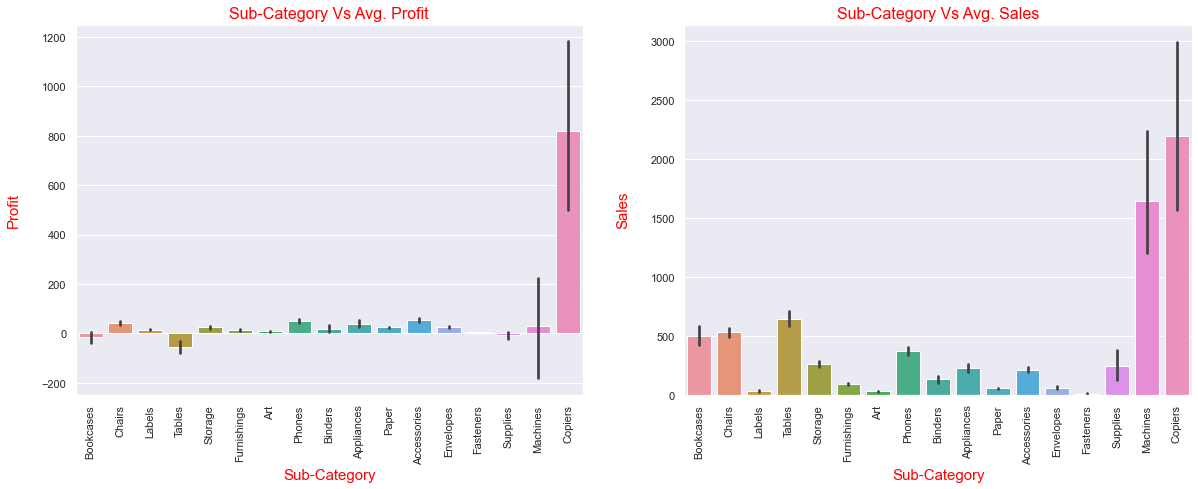

In [46]:
plt.figure(figsize=[20,15])

plt.subplot(2,2,1)
sns.barplot(retail['Sub-Category'], retail.Profit)
plt.title('Sub-Category Vs Avg. Profit', fontdict = {'color': 'red', 'size': 16})
plt.xlabel('Sub-Category', fontdict = {'color': 'red', 'size': 15})
plt.ylabel('Profit\n', fontdict = {'color': 'red', 'size': 15})
plt.xticks(rotation = 90)

plt.subplot(2,2,2)
sns.barplot(retail['Sub-Category'], retail.Sales)
plt.title('Sub-Category Vs Avg. Sales', fontdict = {'color': 'red', 'size': 16})
plt.xlabel('Sub-Category', fontdict = {'color': 'red', 'size': 15})
plt.ylabel('Sales\n', fontdict = {'color': 'red', 'size': 15})
plt.xticks(rotation = 90)
plt.show()

1. Copiers are making highest profit as well as sales so market is doing good in this product sub-category.

2. Bookcases, label's, Tables, Furnishings, Art, Binders, Fastners, Supplies are certain product categories which are either having very less average profit or completely in loss.

3. Whereas Labels, Art, Fasteners, Paper are the certain categories that are having less profit and sales.

#### Note: Though Binders has less average profit but we saw in count plot Binders has highest number of transactions.

1. Plot the bar plot of Total Profit for Different product Sub-Category

2. Plot the bar plot of Total Sales for different product Sub-Category

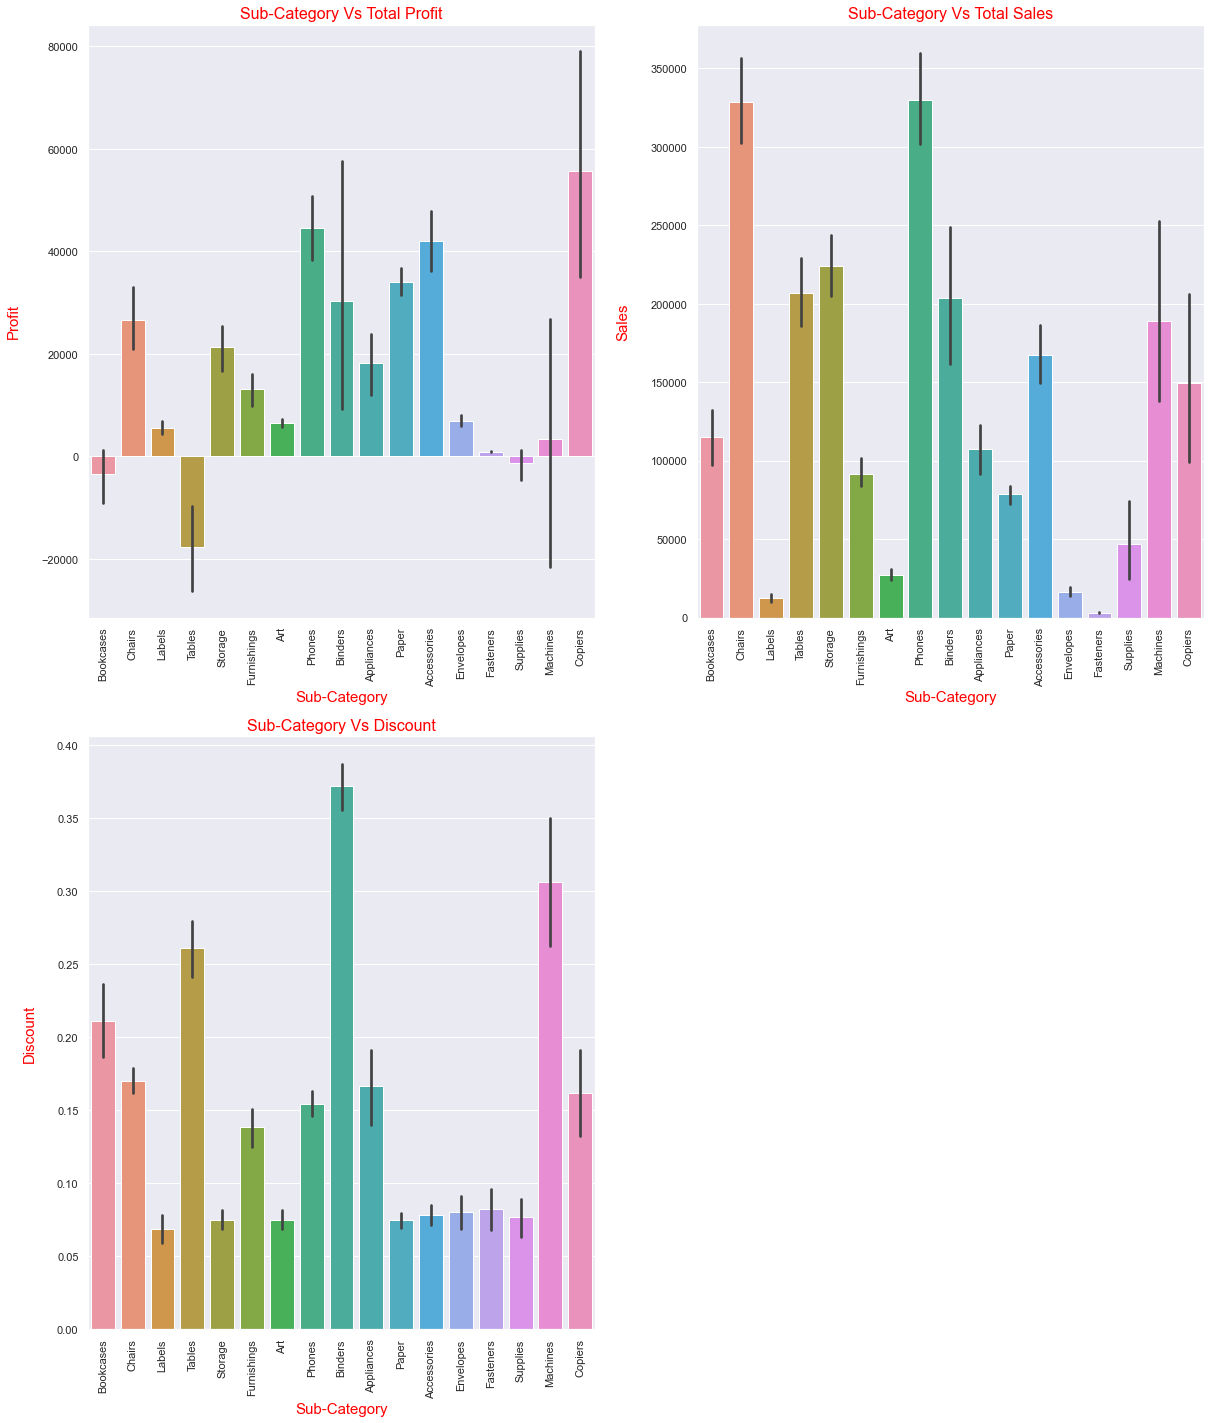

In [47]:
plt.figure(figsize=[20,24])

plt.subplot(2,2,1)
sns.barplot(retail['Sub-Category'], retail.Profit, estimator = sum)
plt.title('Sub-Category Vs Total Profit', fontdict = {'color': 'red', 'size': 16})
plt.xlabel('Sub-Category', fontdict = {'color': 'red', 'size': 15})
plt.ylabel('Profit\n', fontdict = {'color': 'red', 'size': 15})
plt.xticks(rotation = 90)

plt.subplot(2,2,2)
sns.barplot(retail['Sub-Category'], retail.Sales, estimator = sum)
plt.title('Sub-Category Vs Total Sales', fontdict = {'color': 'red', 'size': 16})
plt.xlabel('Sub-Category', fontdict = {'color': 'red', 'size': 15})
plt.ylabel('Sales\n', fontdict = {'color': 'red', 'size': 15})
plt.xticks(rotation = 90)

plt.subplot(2,2,3)
sns.barplot(retail['Sub-Category'], retail.Discount)
plt.title('Sub-Category Vs Discount', fontdict = {'color': 'red', 'size': 16})
plt.xlabel('Sub-Category', fontdict = {'color': 'red', 'size': 15})
plt.ylabel('Discount\n', fontdict = {'color': 'red', 'size': 15})
plt.xticks(rotation = 90)
plt.show()

      1. We can see graph changed for Binder. Though it has less average profit but over all profit of Binders is good. This is because depletion or transaction of Binders is more. We can explore reason of such difference by exploring it at geographic level also. Binders has highest discount so it might have high loss for some pattern.
      
      2. Rest Sub-Categories like Bookcases, Tables, Machine have less profit or loss despite of having good sales. Reason behind this is high discount. So, we can focus on discount provided to these categories.
      
      3. Other Sub - Categories like Labels, Art, Fastners, Paper, Supplies, Envelopes have less profit because of less sales as well as less average profit. So, we should also focus on such Sub-Categories.

#### Conclusion

    1. Data is biased towards United States so we dropped Country column that didn't affect further analysis.
    
    2. Checked Postal Code is something which is regional so dropped column Postal Code to avoid redundant features in further analysis because we drew same insights using column Region, City and State.
    
    3. Have observed quantity is at product level but we didn't have any Product column, so we considered data granularity at Sub-Category level in our analysis.
    
    4. Large no of lutliers are present in Sales and Profit column. Analyzed data at granular level and explored pattern causing such outliers (high loss or profit). Hence, didn't treated outliers because those extreme points might come from some special sales days, festival offers, off-season, high discounts, etc. So, if we treat them, then we might loose some important points in our analysis. Sometimes, treating outliers mislead the analysis. Hence, instead treating them we have considered those outliers.

#### Univarite Analysis

    1. Ship Mode: Standard Calss is having higher contribution whereas Same Day is having lesser transaction.
    
    2. Segment: COnsumer are more in numbers than that of Corporate and Home Office.
    
    3. Region: East & West region is having larger distribution.
    
    4. Category: Office - Supplies are larger in proportion.
    
    5. SUb-Category: Paper and Binders are having major distribution / Transaction and Copiers are having less transactions.
    
    6. State: California is having higher transaction whereas New York and Texas is moderate one.

#### Bivarite Analysis:

##### Numerical - Numerical Analysis

    1. Highest Sales, and Profit are at product Quantity equal to 5.
    
    2. For minimum discount, Profit was good but as discount increases, profit goes down because they are having negative correlation.
        a. Discount above 23% leads to loss and at 50% discount, there is the lowest profit or highest loss.
        b. Highest Sales at 50% discount seems to be an outlier.
        
     3. Sales and Profit are having highest correlation 0.48 whereas Discount and Profit are having highest negative correlation -0.22.
     
#### Note:
            Observed ups and downs in Sales over Discount trend. Peak salea are at 50% discount and beyond 50%, sales decrease gradually, there might be a chance that customer doubted product quality having discount above 50%

##### Numerical - Categorical Analysis:

    1. Observed a drastic change in graphs even though we have comparatively Large Average Profit for Same Day shipment mode but it is making less overall profit and sales for business. Reason might be less people prefer Same Day shipment mode. So, we could focus on its markting.
    
    2. Even though we have less Average Profit for Standard Class shipment mode but large no. of customers prefer this shipment mode which leads to large overall profit for business.
    
    3. Even though we have Large average Profit and Sales for Home Office segment but its making less total profit as well as total sales. Reson behind this might be less transactions for this segment. So, we need to target this segment and try to increase total transactions to make more profit.
    
    3. State Vermont and Wyoming is making highest average profit as well as sales but the overall profit is less. Reason might be less total transactions. So, we considered overall sales of such states.
    
    4. California, New Mexico, Kansas, South Dakota, North Dakota are some of the states which are having very less average profit and average sales. Though California has less average profit but we saw in univariate analysis California has more number of transactions than the other states. Hence, visualized overall profit and sales state wise.
    
    5. Florida, North Carolina, Texas, Pennsylvania, Illinois, Arizona, Oregon, Colorado, Ohio are the states that are completely in loss which is represented by negative profit in the graph. There is no change in overall profit for these states. We should focus on such states.
    
    6. Central region is having minimum profit as well as sales. So, we explored pattern for Central Region why it is having less profit and need to focus on that region to excel business profit.
    
    7. Though we have highest average profit for category Technology but we saw in count plot it has overall less transaction than other categories. Hence, visualized over all Profit and Sales Category wise.
    
    8. As we saw clearly though Category Furniture has good sales but it is making less profit. One reason might be high discount as we saw in the trend.
    
    9. Visualized product categories over Average Discount, as expected products in Category Furniture has more average discount than the other categories.
    
    10. Copiers are making highest profit as well as sales so market is doing good in this product sub - category.
    
    11. Bookcases, labels, Tables, Furnishings, Art, Binders, Fastners, Supplies are certain product categories which are either having very less average profit or completely in loss. Even though Binders has less average profit but we saw in count plot Binders have highest number of transactions. Hence, overall profit of Binders are good.
    
    12. Also, Binders have highest discount so it might have high loss for some other patterns.
    
    13. Sub - Categories like Bookcases, Tables, Machine have less profit or loss despite of having good sales. Reason behind this is highest discount. So, we could focus on discount provided to these categoris.

#### City - wise Profit Exploration

    As we saw, Sub - Categories Bookcases, Tables, Machine, Labels, Art, Fasteners, Paper, Supplies, Envelopes are either making less profit or loss. We explored data city wise to know in which city these sub - categories are making loss or less profit.
    
#### This multi - variate analysis was not possible with 2-D graphs because of large no. of cities. Hence, I have created a widget for better and handy visualization.

    1. Visualized city - wise profit for Sub - Cateogry Bookcases Cities like Philadelphia, Huston, Colorado Spring having high loss so we need to focus in these cities whereas cities like Burlington, San Francisco are making more profit so we could increse stock in these cities rather than cities which are making loss.
    
    2.Visualized discount for Sub - Category Bookcases across cities, most of the cities are providing high discount. This might be one reson for loss or less profit.
    
    3. Visualized city - wise profit for Sub - Cateogory Tables, cities like Settle are making highest profit at minimum discount. Hence, we could increase stock in the area for more business profit.
    
    
#### Recommendations:

    1. We saw disount above 23% leads to loss and at 50% discount, it gives highest loss. So, we should avoid to give large discount i.e, beyond 23% to make profit because more discount sometimes raise the question on product quality. Hence, this might decrease overall sales.
    
    2. We should focus on the city like Burlington, San Francisco as we could make highest profit if we increase the Bookcases stock in these area as they are making large profit.
    
    3. Cities like Philadelphia, Houston, Colorado Spring are making loss, so we should not increase the Bookcases stock in these area to avoid severe loss.
    
    4. City like Settle are making highest profit at minimum discount for Tables. Hence, we could increase stock in this area for more business profit.
    
    5. State California has more number of transcations than the other states though it's having less average profit but we can increase product stock in this area.
    
    6. Binders have highest number of Transactions. Hence, overall profit is good. Also, Binders have highest discount so it might give high loss for some other patterns. So, we should handle it accordingly.
    
    7. Florida, North Carolina, Texas, Pennsylvania, Illinois, Arizona, Tennessee, Oregon, Colorado, Ohio are the states that are completely in loss. So, we should not increase stock in these areas because this would lead a high loss to the business.
    
    8. Sub - Categories like Bookcases, Tables, Machine have less profit or loss despite of having good sales. Reason behind this might be high discount. So, we should focus over discount provided to these categories.
    
    9. Category Furniture has good sales but it is making less profit. We should focus on the discount provided for this category.
    
    10. Since, Technology is making highest average profit but having less no of transactions so we could increase the product stock for this sub - category.
    
    

####                                             Thank You!!